# 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 깨짐 문제 해결용
from matplotlib import font_manager, rc
plt.rcParams["axes.unicode_minus"] = False
path = "C:\Windows\Fonts\H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=path).get_name()
rc("font", family=font_name)

# 1. Data

In [3]:
cn7 = pd.read_csv("data/processed/labeled_data_KAMP_cn7.csv", parse_dates=True)

In [4]:
cn7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736 entries, 0 to 6735
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassOrFail                6736 non-null   object 
 1   Injection_Time            6736 non-null   float64
 2   Filling_Time              6736 non-null   float64
 3   Plasticizing_Time         6736 non-null   float64
 4   Cycle_Time                6736 non-null   float64
 5   Clamp_Close_Time          6736 non-null   float64
 6   Cushion_Position          6736 non-null   float64
 7   Plasticizing_Position     6736 non-null   float64
 8   Clamp_Open_Position       6736 non-null   float64
 9   Max_Injection_Speed       6736 non-null   float64
 10  Max_Screw_RPM             6736 non-null   float64
 11  Average_Screw_RPM         6736 non-null   float64
 12  Max_Injection_Pressure    6736 non-null   float64
 13  Max_Switch_Over_Pressure  6736 non-null   float64
 14  Max_Back

# 2. EDA

In [5]:
# "PassOrFail" 변수 변환
cn7["PassOrFail"] = cn7["PassOrFail"].replace("Y", 0).replace("N", 1)

In [6]:
# 변수별 통계량 확인
cn7.describe()

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,...,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000
mean,0.005790,9.580064,4.448425,16.820433,59.549314,7.113639,653.440859,68.381941,644.899046,55.523085,...,59.347209,275.965024,275.134961,274.858091,270.285823,254.924346,229.971512,66.663094,22.074228,23.473619
std,0.075876,0.180526,0.140286,0.288946,0.372267,0.075843,0.115004,0.648307,42.170577,1.005340,...,3.530820,2.302366,1.887356,1.854329,2.018081,1.134566,0.428762,2.433782,1.171389,1.370780
min,0.000000,9.360000,3.350000,16.469999,58.840000,6.070000,653.390015,59.759998,69.639999,38.500000,...,13.300000,244.699997,249.000000,249.600006,244.399994,239.699997,224.600006,38.500000,19.100000,20.600000
25%,0.000000,9.530000,4.420000,16.629999,59.480000,7.120000,653.429993,68.320000,647.989990,55.099998,...,59.400002,275.799988,275.000000,274.799988,269.700012,254.800003,229.800003,65.599998,21.200001,22.600000
50%,0.000000,9.570000,4.450000,16.820000,59.520000,7.120000,653.429993,68.360001,647.989990,55.400002,...,59.500000,276.100006,275.299988,275.000000,270.399994,255.000000,230.000000,67.000000,21.900000,23.299999
75%,0.000000,9.600000,4.480000,16.910000,59.540001,7.120000,653.440002,68.510002,647.989990,55.900002,...,59.700001,276.399994,275.500000,275.200012,271.100006,255.199997,230.100006,67.800003,22.799999,24.200001
max,1.000000,13.390000,8.270000,21.100000,64.349998,7.180000,655.000000,68.860001,647.989990,64.800003,...,90.800003,277.899994,276.500000,276.000000,272.399994,256.299988,230.699997,70.599998,25.299999,27.799999


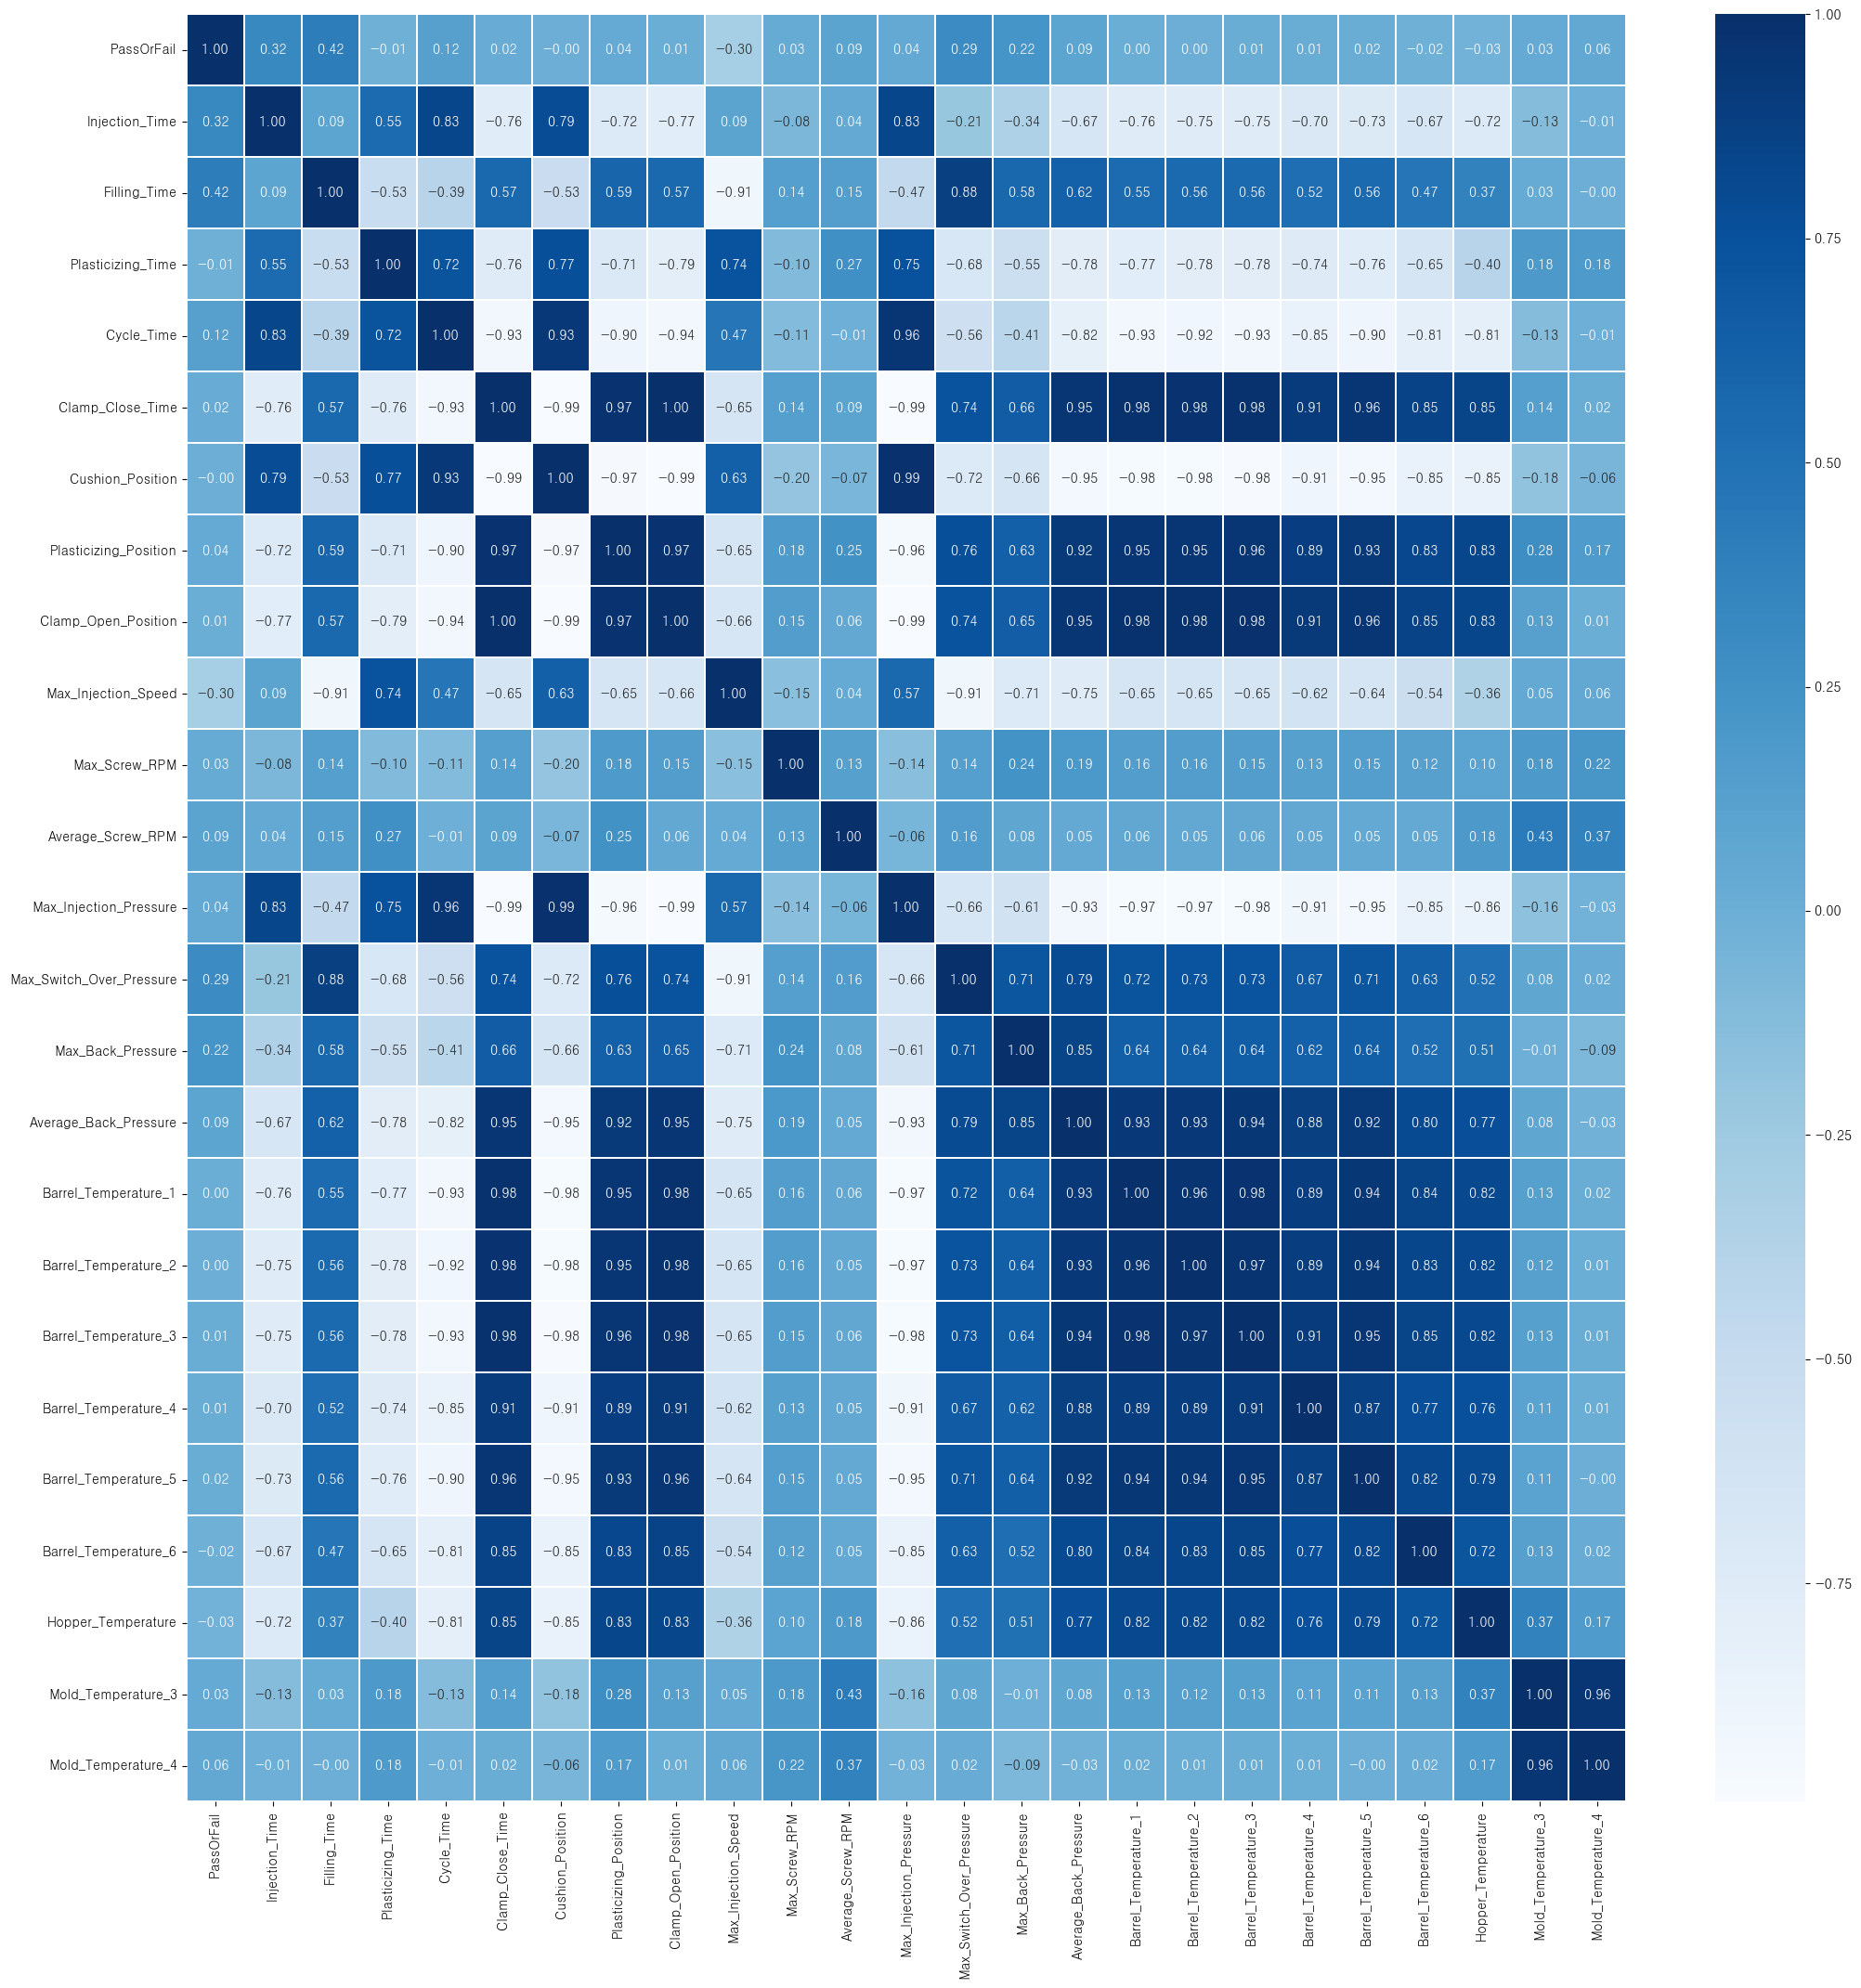

In [7]:
# 상관 관계 확인
plt.figure(figsize=(25, 25))
sns.heatmap(data=cn7.corr(), linewidths=0.1, annot=True, fmt=".2f", cmap="Blues");

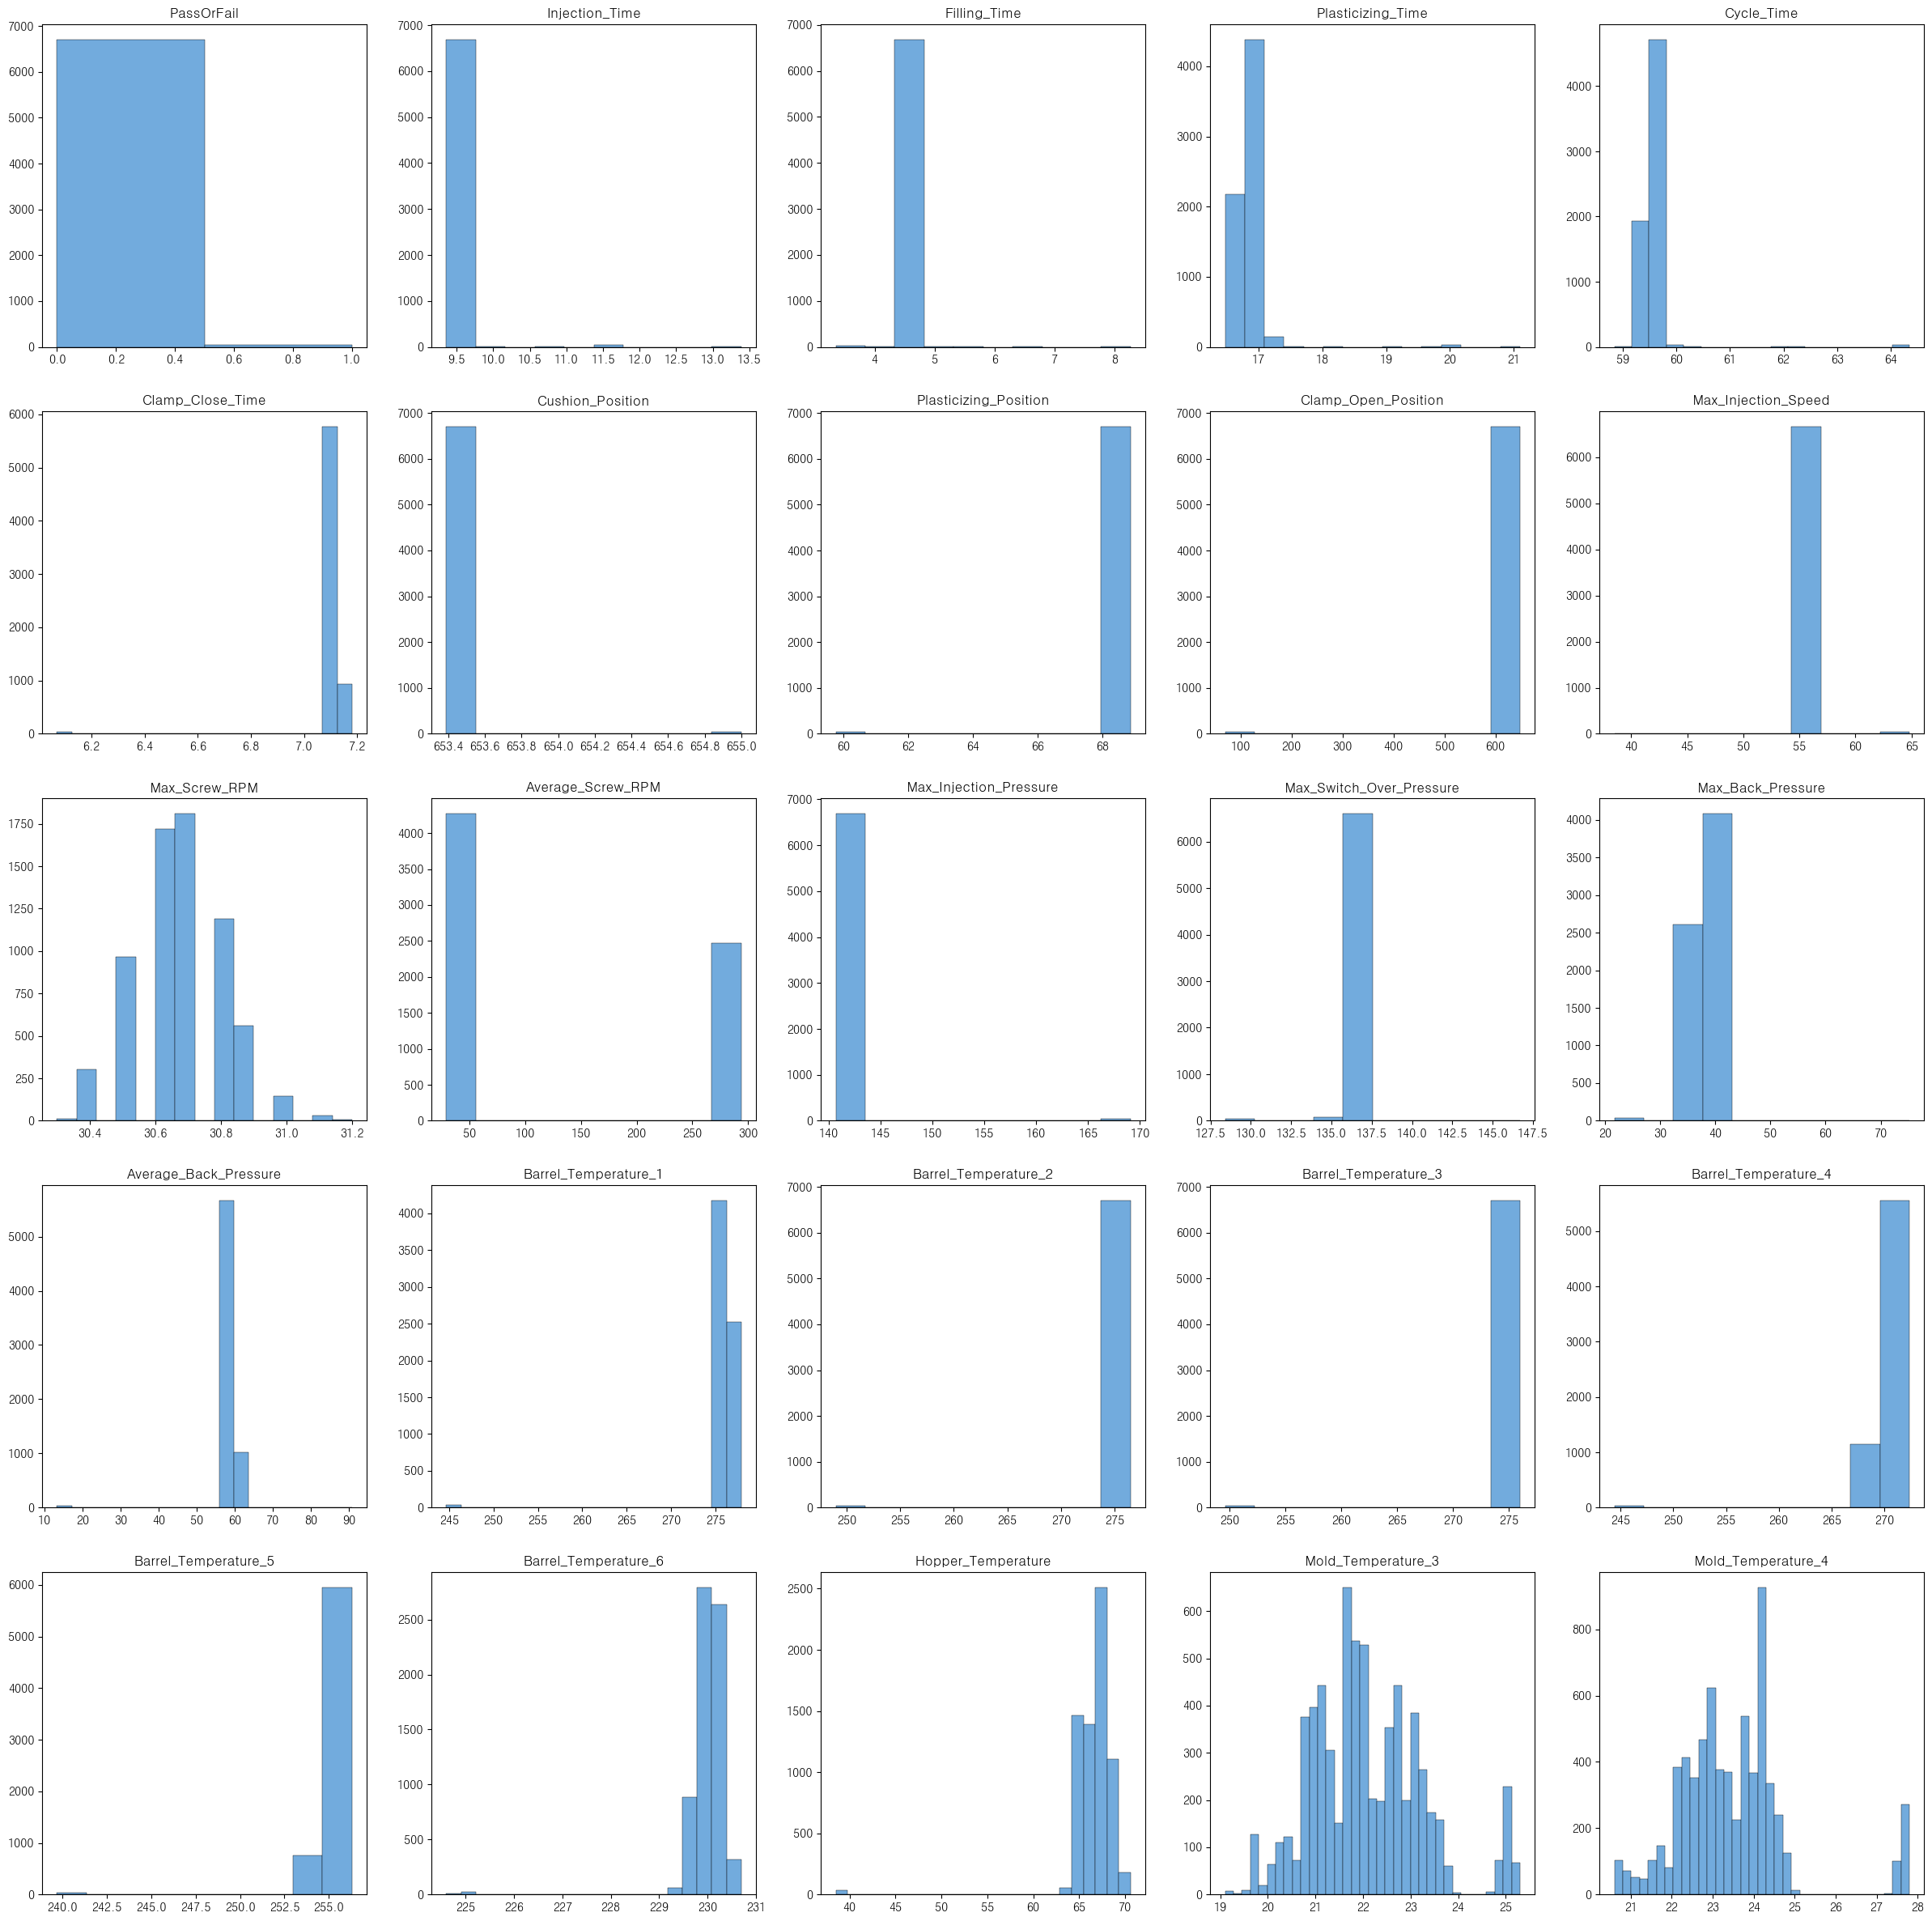

In [8]:
# 변수별 분포도 확인
plt.figure(figsize=(30, 30))

bin = [
    2, 10, 10, 15, 17, 20, 10, 10, 10, 10, 15, 10, 10, 10, 10, 
    20, 20, 10, 10, 10, 10, 20, 25, 35, 35
]

for index, value in enumerate(cn7):
    sub = plt.subplot(5, 5, index+1)
    sub.hist(
        cn7[value], bins=bin[index], facecolor=(114/255, 171/255, 221/255), 
        linewidth=.3, edgecolor="black"
    )
    plt.title(value)

In [9]:
# 2차 가공 dataframe csv로 저장

cn7.to_csv("data/processed/labeled_data_KAMP_cn7_1.csv", index=False)